# K723: Data Mining<br>
## Assignment ONE: Clustering 
**Released: Wednesday, October 1, 2025**<br>
**Due on: Monday, October 19, 2025 Before midnight.**

**Please enter your name and student number here:**
<div class="alert alert-block alert-info"> 
    <b>Student Info:</b><BR>
    <ul>
        <li>Student Name: Karim Kaufmann</li>
        <li>Student Number: 400677758</li>
        <li>MAC ID: --------</li>
    </ul>
</div>

**Please follow the following instructions for completing the assignment:**<br>
- **Questions will appear in red alert blocks.**
<div class="alert alert-block alert-danger"> <b>Question number:</b> The body of the question.</div>

    - **For some questions, you only need to modify and run the code.** 
    - **For other questions, you will need to write short report inside green alert blocks.**
<div class="alert alert-block alert-success"> <b>A title: (Optional)</b> Your answer. You can make part of your answer <b>bold</b>, <i>italic</i>, or <u>underlined</u> </div>

- **I will use yellow alert blocks to add helpful comments**
<div class="alert alert-block alert-warning"> <b>Comment title: </b>Comment itself
</div>

- **You will use the following packages for this assignment:**
    - *`numpy`* for mathematical calculations, 
    - *`pandas`* for data handling, 
    - *`scikit-learn`* and *`scipy`* for cluster analysis
       - *`scipy`* to demonstrate hierarchical clustering 
       - *`scikit-learn`* for non-hierarchical clustering
       <br>Both packages provide methods for both types of clustering
    - *`matplotlib`* for visualization.<br>
- **Alongside this notebook you will receive a dataset labeled *`east_west_airlines.csv`*. Please:**
    - Save the dataset and notebook in your *`Working Directory`*
    - Complete the following codes, run them, and use the outcomes to answer questions.
        - Replace ------- with required codes (find them from the notebooks we used in the class and posted on the avenue)


### Dataset Description:

<div class="alert alert-block alert-warning"> <b>The file east_west_airlines.csv contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.</b>
    <ol>
        <li>Unique ID</li>
        <li>Number of miles eligible for award travel</li>
        <li>Number of miles earned with freq. flyer credit card in the past 12 months</li>
        <li>Number of miles earned with Rewards credit card in the past 12 months</li>
        <li>Number of miles earned with Small Business credit card in the past 12 months</li>
        <li>Number of miles earned from non-flight bonus transactions in the past 12 months</li>
        <li>Number of non-flight bonus transactions in the past 12 months</li>
        <li>Number of days since enrolled in flier program</li>
        <li>Whether that person had award flight (free flight) or not</li>
    </ol>
</div>

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

%matplotlib inline

-----
-----
### Question 01: Exploring the data and feature scaling (20%)

-----
<div class="alert alert-block alert-danger"> <b>01-01) Please Read data from CSVfile and answer/ the following questions (2%):</b> 
    <ul>
        <li>How many passengers does the dataset have?</li>
        <li>How many features are describing each passenger?</li>
        <li>Legal: 5.905 </li>
        <li>Show <b>the exact</b> first THREE and last THREE observations: </li>
    </ul>
</div>


In [2]:
eastwest_df = pd.read_csv("east_west_airlines.csv")
print("Size of the dataset (row, col): ", eastwest_df.shape)
print("\nFirst few obserations\n", eastwest_df.head(3))
print("\nLast few obserations\n", eastwest_df.tail(3))

Size of the dataset (row, col):  (3999, 12)

First few obserations
    ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1    28143           0          1          1          1          174   
1   2    19244           0          1          1          1          215   
2   3    41354           0          1          1          1         4123   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0            1                  0                0               7000      0  
1            2                  0                0               6968      0  
2            4                  0                0               7034      0  

Last few obserations
         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1   

<div class="alert alert-block alert-success"> <b>Data set size</b> There are 3999 records, with 12 features describing each one.</div>


----
<div class="alert alert-block alert-danger"> <b>01-01) Run summary statistics and answer the following questions (3%):</b> 
    <ul>
        <li>What is the range of each four numerical variables?</li>
        <li>Which two variables have the highest correlation?</li>
    </ul>
</div>


In [3]:
print("\nSummary statistics:\n", eastwest_df.describe())
print("\nRange (max - min) for each numerical variable:\n", eastwest_df.max() - eastwest_df.min())
print("\nCorrelation matrix\n", eastwest_df.corr())


Summary statistics:
                 ID       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.00000

<div class="alert alert-block alert-success"> 
    <b>Range</b> <br>
    <ul>
        <li>Balance: 170438 </li>
        <li>Qual-miles: 11148 </li>
        <li>Bonus_miles: 263685 </li>
        <li>Days_since_enroll: 6996 </li>
    </ul>
     <br>
    <b>Correlation:</b> The highest correlation is 0.869, observed between Flight_miles_12mo and Flight_trans_12.
</div>

----
<div class="alert alert-block alert-danger"> <b>01-02) Create box plots for all numerical variables (5%): </b><i>(you need to complete and run the first two lines for all variables)</i> 
    <ul>
        <li>Are there any outliers in your dataframe? Which feature(s)</li>
    </ul>
</div>


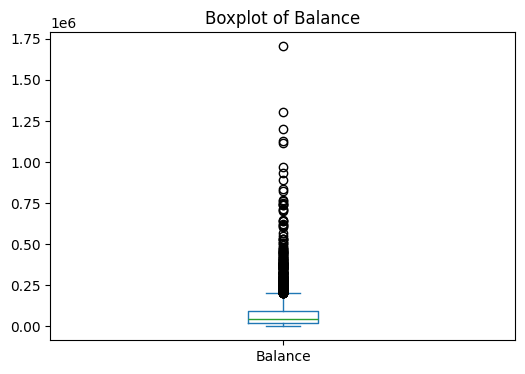

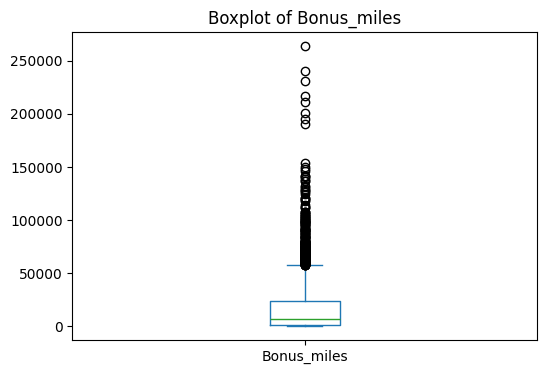

In [4]:
plt.figure(figsize=(6,4))
eastwest_df['Balance'].plot(kind ='box', title ='Boxplot of Balance')

plt.figure(figsize=(6,4))
eastwest_df['Bonus_miles'].plot(kind ='box', title ='Boxplot of Bonus_miles')


plt.show()

<div class="alert alert-block alert-success"> 
    <b>Outliers:</b> <br>
    There are potential outliers in feature(s): Balance and Bonus_miles.
</div>

----
<div class="alert alert-block alert-danger"> <b>01-03) Create scatter plots for all pairs of numerical variables (5%): </b><i>(you need to complete and run the first two lines for all pairs of numerical variables)</i> 
    <ul>
        <li>What patterns can you see in scatter plots? <br><i>Compare the plots with the correlation matrix from the question 01-02</i></li>
    </ul>
</div>


<Figure size 600x400 with 0 Axes>

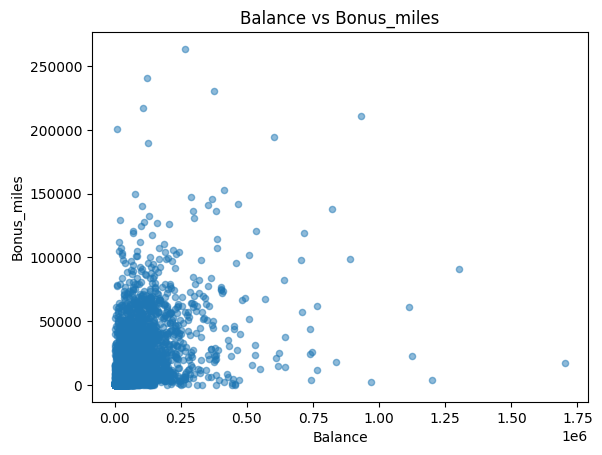

<Figure size 600x400 with 0 Axes>

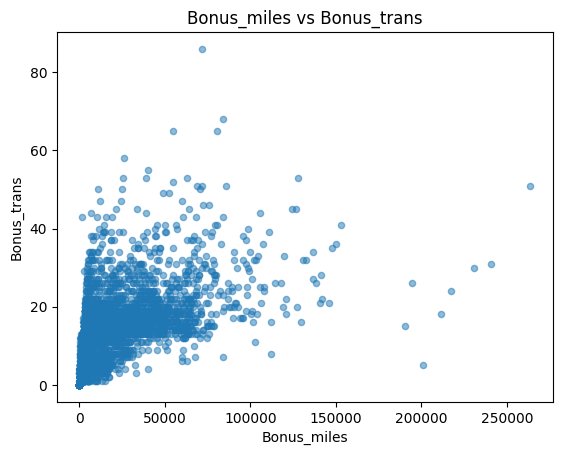

In [5]:
plt.figure(figsize=(6,4))
eastwest_df.plot(kind ='scatter', x='Balance', y='Bonus_miles', title ='Balance vs Bonus_miles', alpha = 0.5)

plt.figure(figsize=(6,4))
eastwest_df.plot(kind ='scatter', x='Bonus_miles', y='Bonus_trans', title ='Bonus_miles vs Bonus_trans', alpha = 0.5)


plt.show()

<div class="alert alert-block alert-success"> <b>Patterns based on scatter plots: </b>
    <BR> 
    ---------- "Balance" and "Bonus_miles" show a weak positive relationship"Bonus_miles" and "Bonus_trans" show a strong positive correlationThe patterns match the correlation matrix results from Question 01-02. -------
</div>

----
<div class="alert alert-block alert-danger"> <b>01-05) Apply feature scaling and explain its importance(5%): </b>
    <ul>
        <li>Apply feature Scaling (2%)</li>
        <li>Why is feature scaling critical before calculating distances between observations and clusters? (2%)</li>
        <li>How can you reverse the feature scaling and retrieve actual values? (1%)</li>
    </ul>
</div>

In [9]:
from sklearn.preprocessing import StandardScaler

eastwest_df2 = eastwest_df[['Balance', 'Qual_miles', 'Bonus_miles', 
                            'Bonus_trans', 'Flight_miles_12mo', 'Days_since_enroll']]
#eastwest_df2.set_index('ID#', inplace=True)
eastwest_df2 = eastwest_df2.apply(lambda x: x.astype('float64'))

# pandas uses sample standard deviation
scaler=StandardScaler()
eastwest_df_norm = pd.DataFrame(scaler.fit_transform(eastwest_df2), 
                                columns=eastwest_df2.columns)

print("\nStandardized dataset:\n", eastwest_df_norm.head())


Standardized dataset:
     Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0 -0.451141   -0.186299    -0.702786    -1.104065          -0.328603   
1 -0.539457   -0.186299    -0.701088    -0.999926          -0.328603   
2 -0.320031   -0.186299    -0.539253    -0.791649          -0.328603   
3 -0.583799   -0.186299    -0.689286    -1.104065          -0.328603   
4  0.239678   -0.186299     1.083121     1.499394           1.154932   

   Days_since_enroll  
0           1.395454  
1           1.379957  
2           1.411920  
3           1.372208  
4           1.363975  


<div class="alert alert-block alert-success"> <b>Feature Scaling: </b>
    <BR> 
    Feature scaling ensures that all numerical variables contribute equally to distance calculations ADD YOUR ANSWER HERE (The importance of feature scaling) -------
    <BR> 
    <BR> 
    -You can reverse the scaling using
scaler.inverse_transform(eastwest_df_norm)
This converts the standardized values back to their original units. ADD YOUR ANSWER HERE (How to reverse feature scaling to calculate actual values) -------
</div>

-------
-------
### Question 02: Hierarchical Clustering  (25%)
----
<div class="alert alert-block alert-danger"> <b>02-01) Compute normalized distances based on continous variables (5%): </b>
</div>


In [10]:
from sklearn.metrics import pairwise_distances

# compute normalized distance based on two numerical features from the dataset
distanceNorm = pairwise_distances(
    eastwest_df_norm[['Balance', 'Bonus_miles']],  # hier statt Sales/Fuel Cost
    metric='euclidean'
)

print(distanceNorm[:5, :5])

[[0.00000000e+00 8.83324108e-02 2.09601862e-01 1.33342897e-01
  1.91486181e+00]
 [8.83324108e-02 0.00000000e+00 2.72650702e-01 4.58854493e-02
  1.94690901e+00]
 [2.09601862e-01 2.72650702e-01 0.00000000e+00 3.03452168e-01
  1.71620839e+00]
 [1.33342897e-01 4.58854493e-02 3.03452168e-01 1.49011612e-08
  1.95436461e+00]
 [1.91486181e+00 1.94690901e+00 1.71620839e+00 1.95436461e+00
  0.00000000e+00]]


<div class="alert alert-block alert-danger"> <b>02-02) Compare hierarchical clustering (10%)</b>
    <ul>
        <li>Use at least three different distance measurement methods (Ward, Centroid, Average). Compare Dendrograms and explain why different methods create different results.</li>
    </ul>
</div>




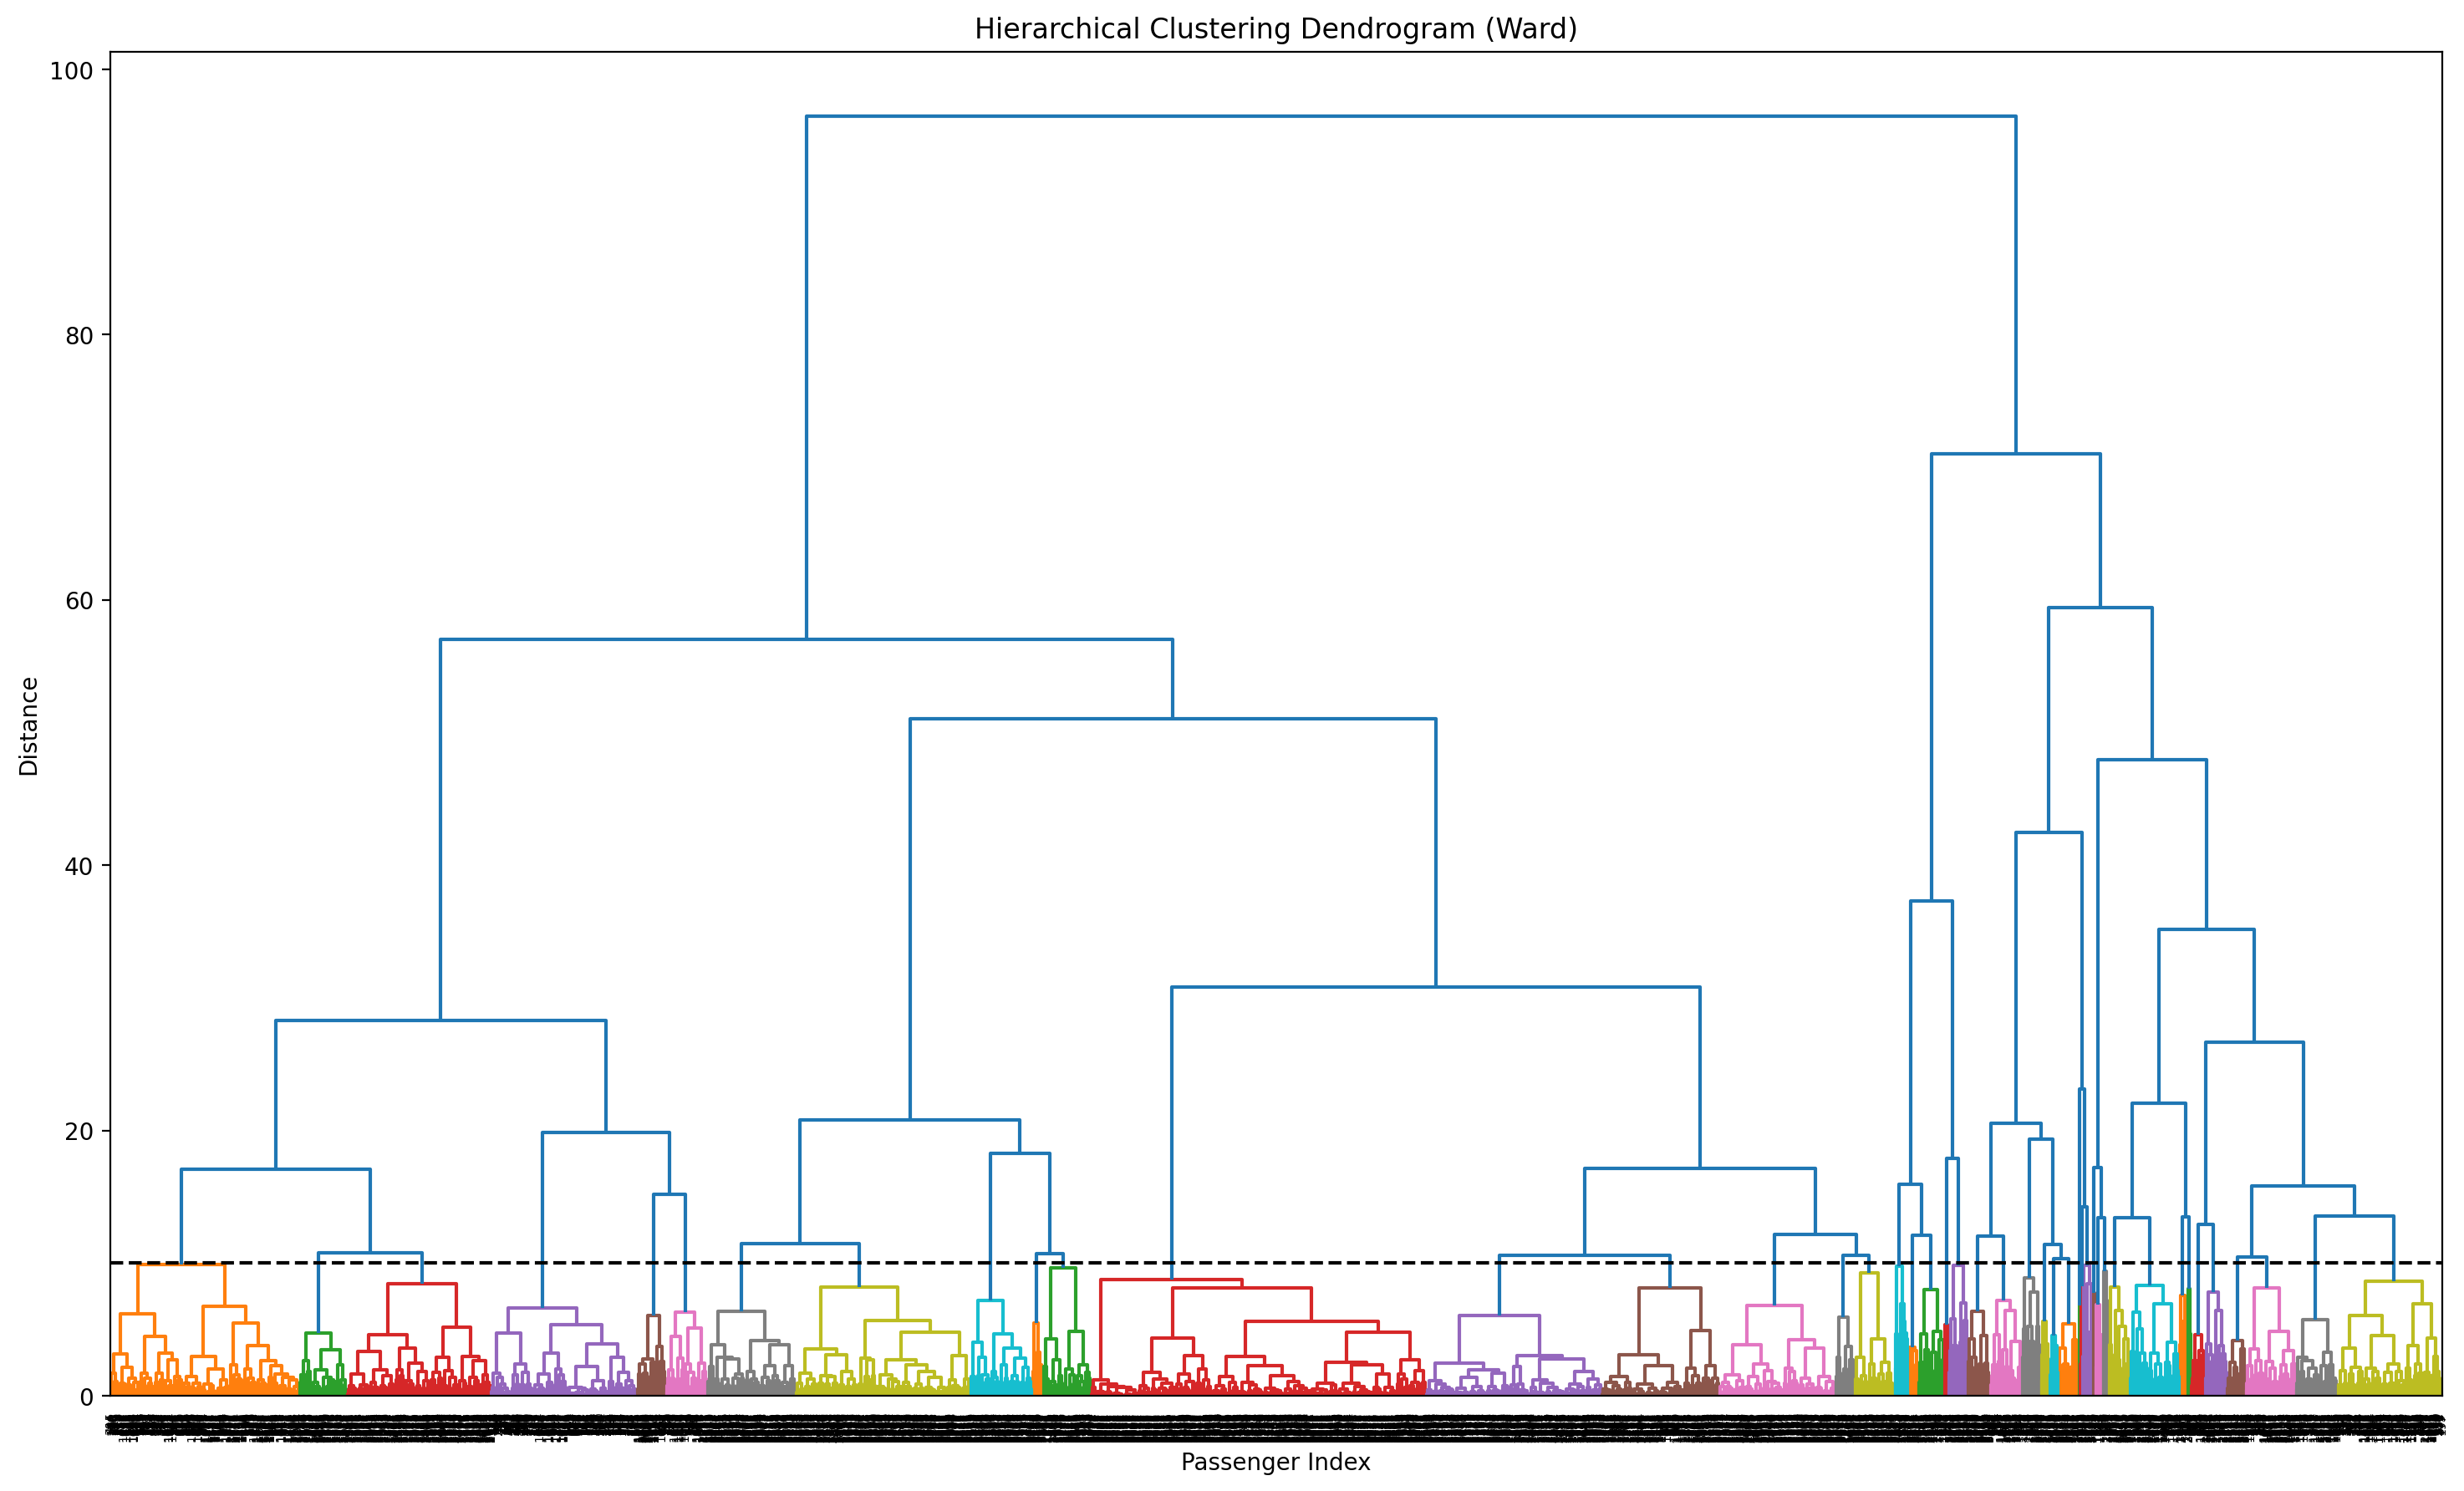

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram



Z = linkage(eastwest_df_norm, method='ward')

fig = plt.figure(figsize=(18, 12), dpi=200)
fig.subplots_adjust(bottom=0.21)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Passenger Index')
plt.ylabel('Distance')

dendrogram(Z, 
           labels=eastwest_df_norm.index,
           color_threshold=10)  
plt.axhline(y=10, color='black', linewidth=1.5, linestyle='dashed')
plt.show()

<div class="alert alert-block alert-warning"> 
    <b>Comparison: </b> Redo the previous block of code in the following Cell(s) for at least one other measurement method and compare the results.<br>
    <b>dpi (dot per inch): </b> a higher value of dpi allows you to have a high-quality image that you can download or open in a new tab. 
</div>

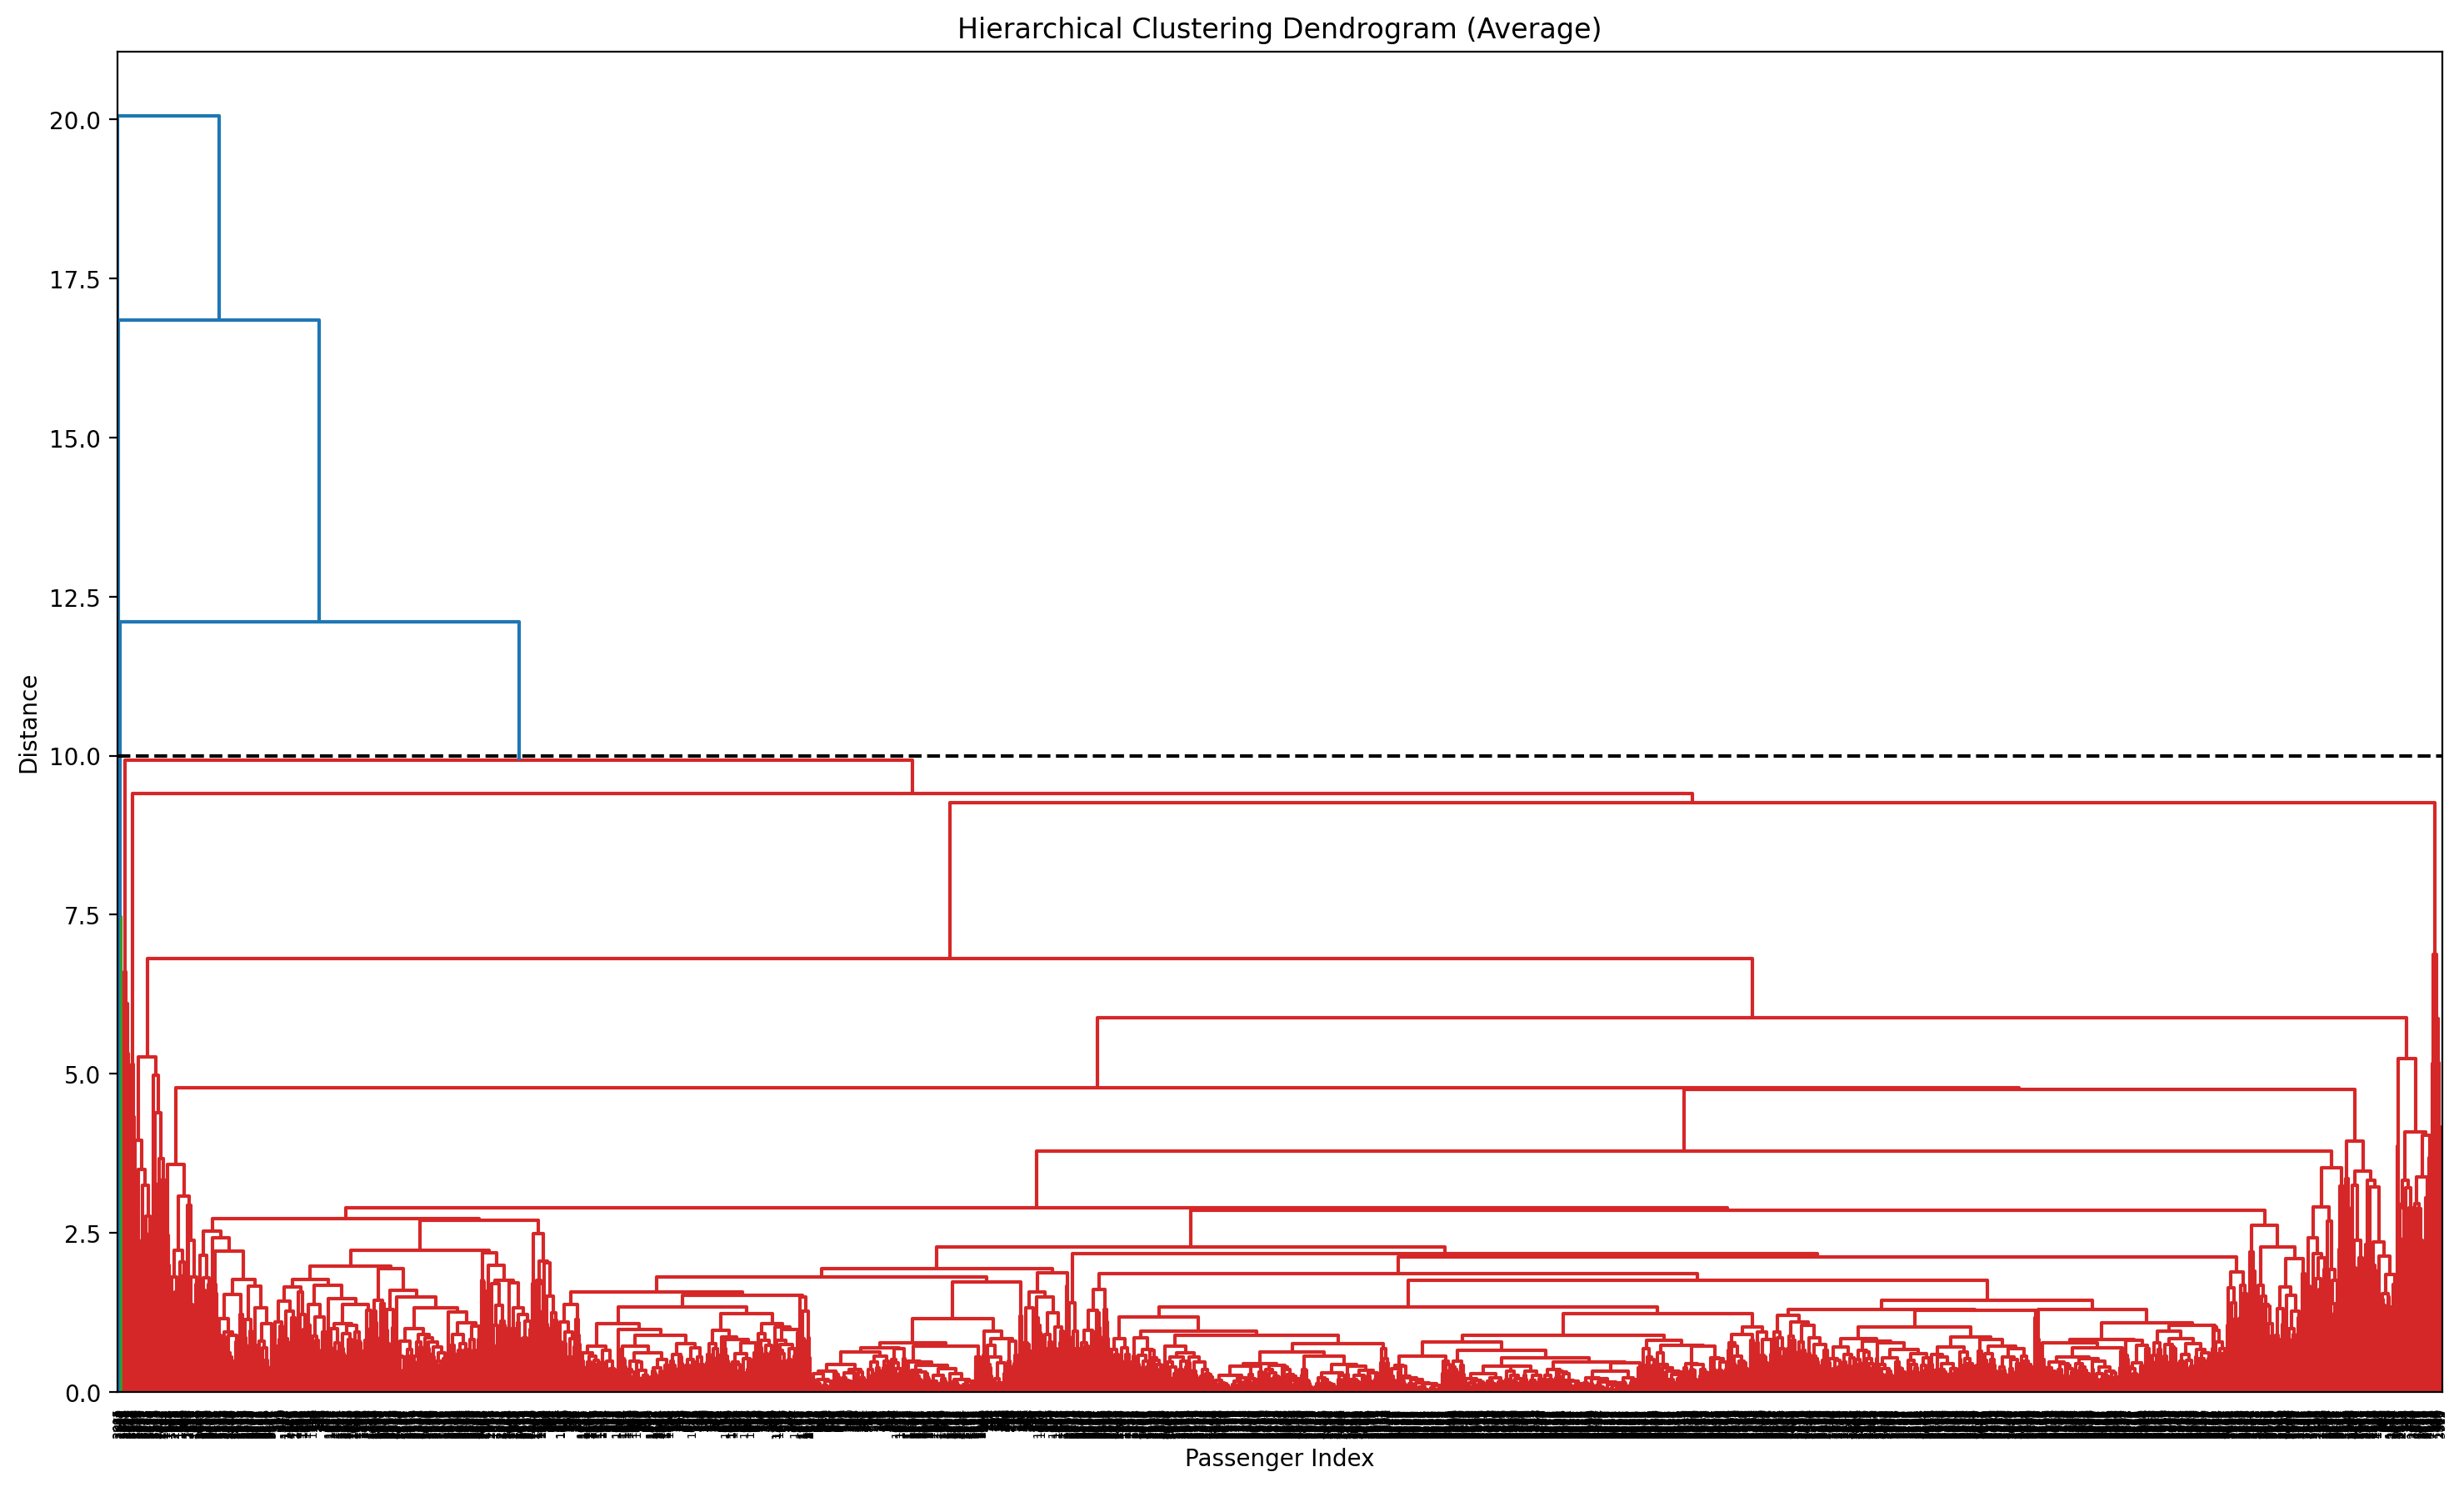

In [13]:
Z_avg = linkage(eastwest_df_norm, method='average')

fig = plt.figure(figsize=(18, 12), dpi=200)
fig.subplots_adjust(bottom=0.21)
plt.title('Hierarchical Clustering Dendrogram (Average)')
plt.xlabel('Passenger Index')
plt.ylabel('Distance')

dendrogram(Z_avg, 
           labels=eastwest_df_norm.index,
           color_threshold=10)
plt.axhline(y=10, color='black', linewidth=1.5, linestyle='dashed')

plt.show()

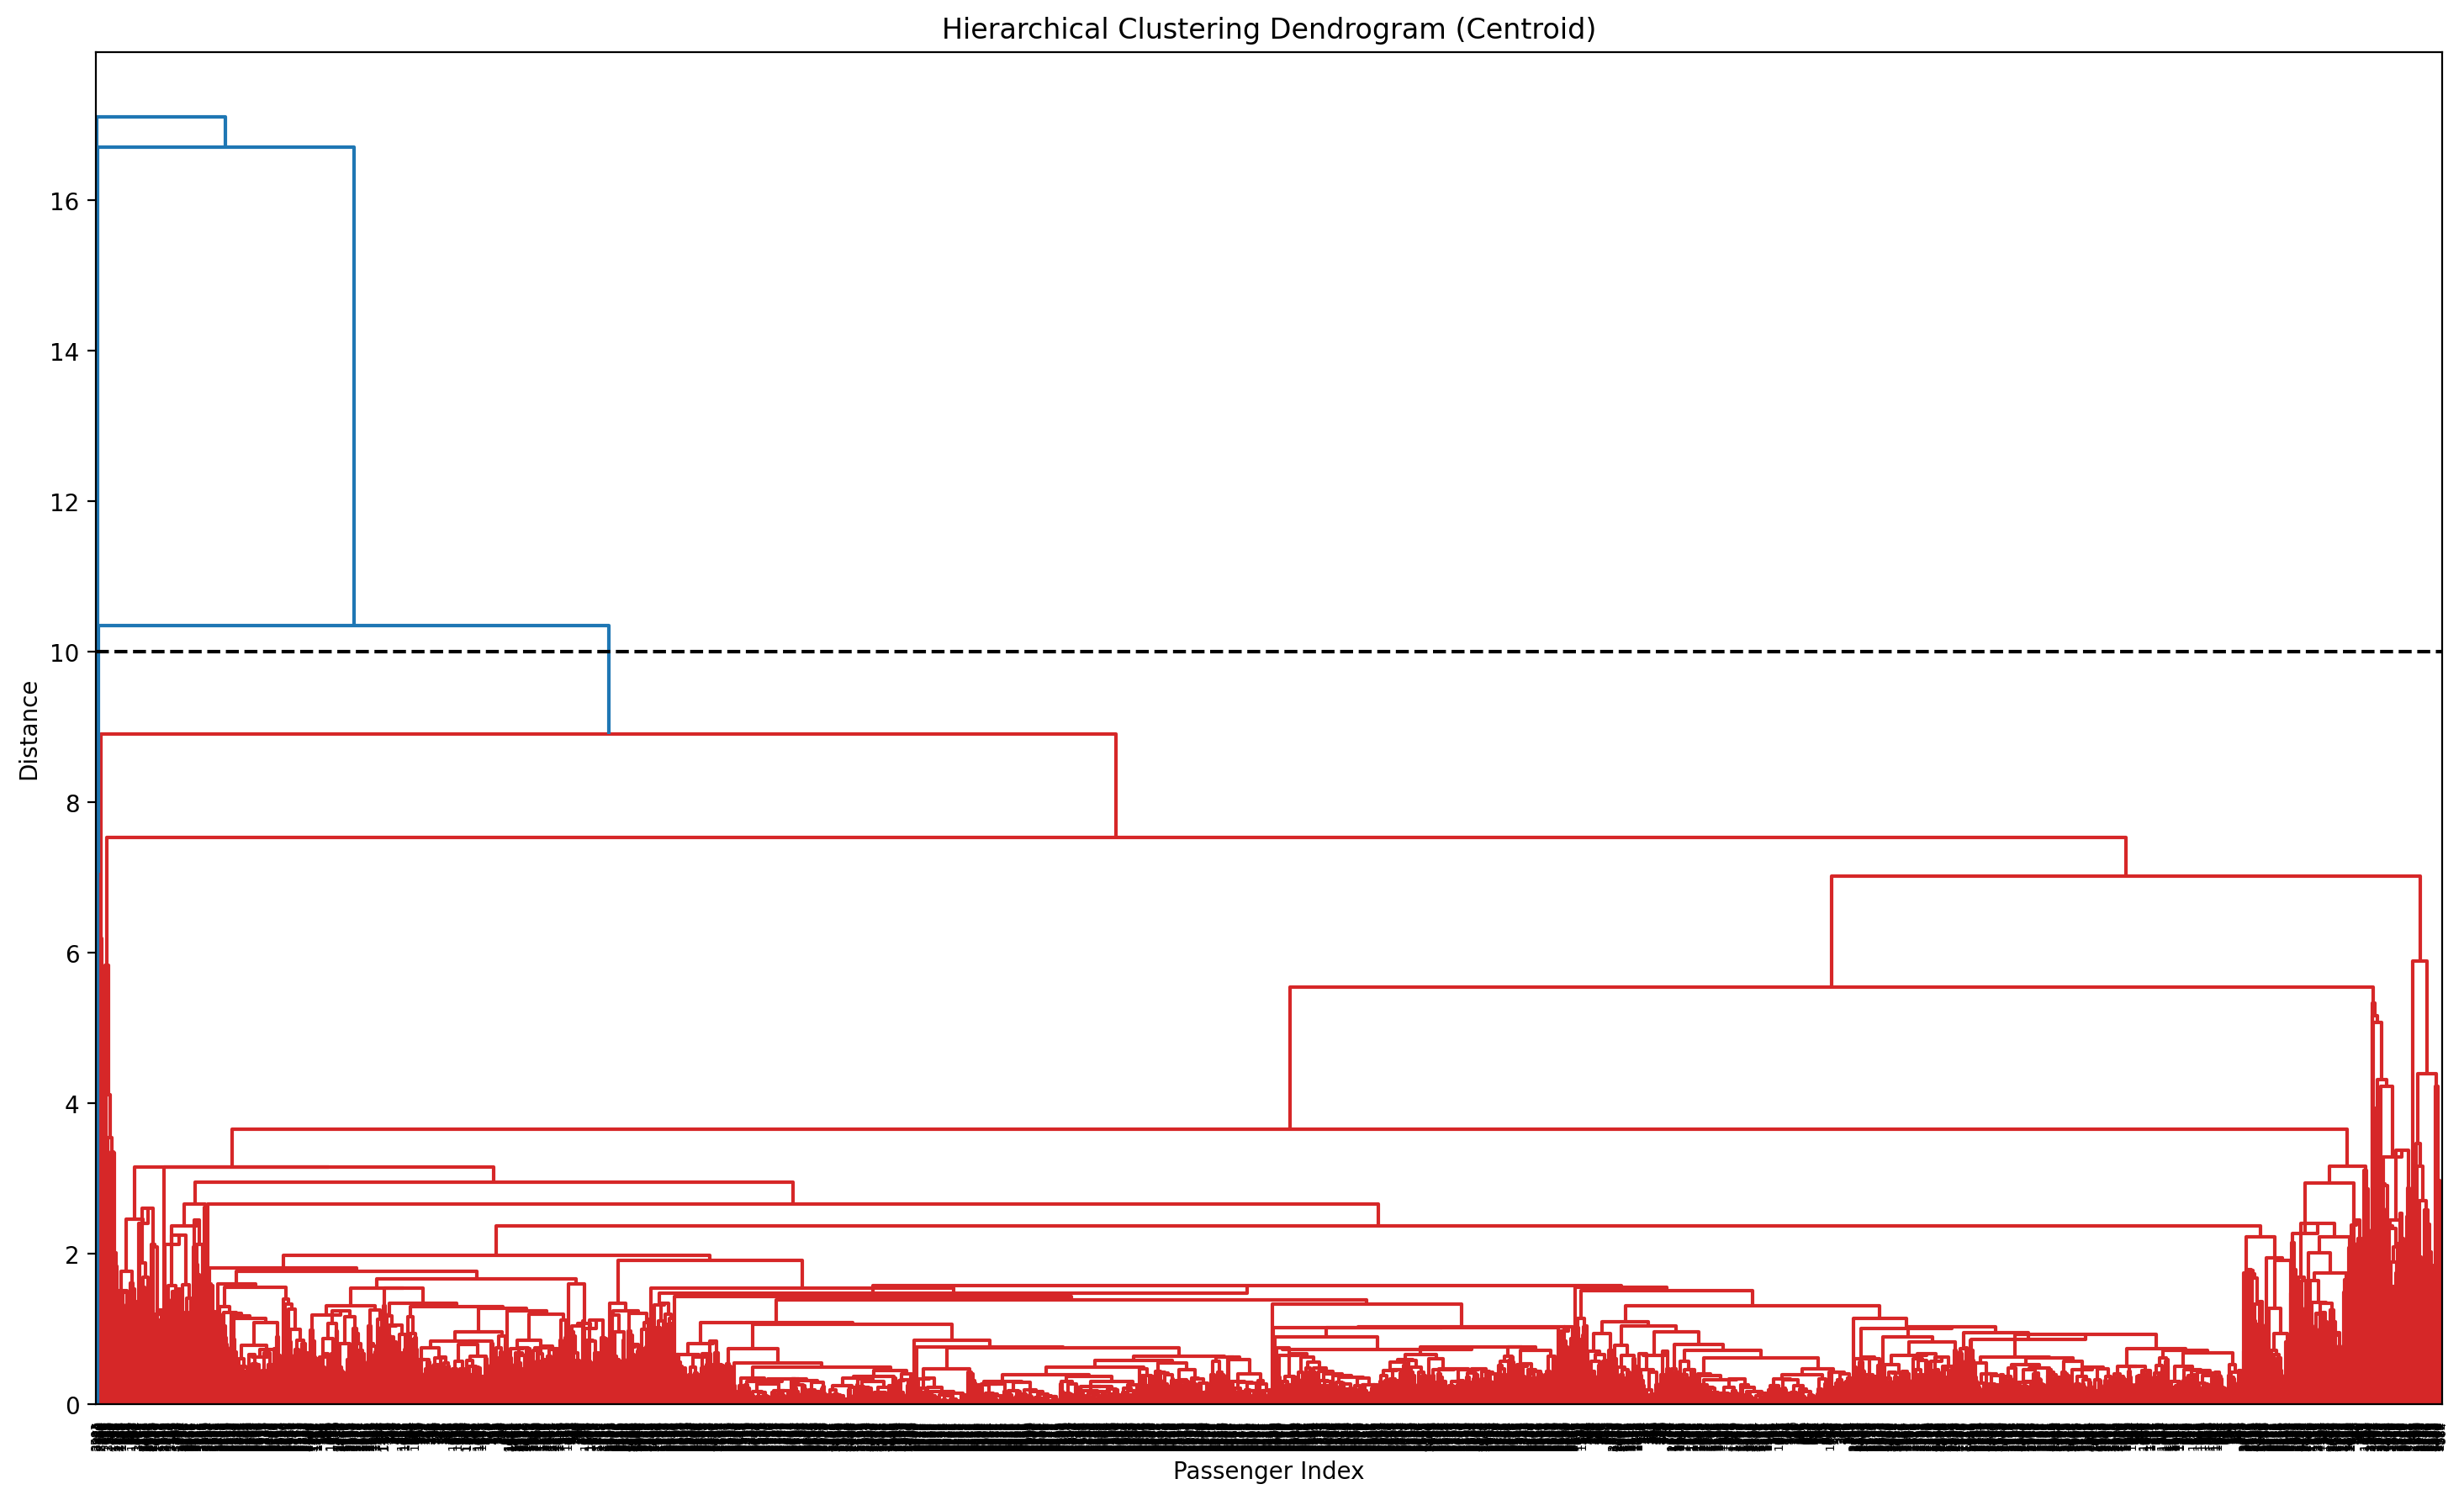

In [14]:
#Use for second distance method#
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z_cent = linkage(eastwest_df_norm, method='centroid')

fig = plt.figure(figsize=(18, 12), dpi=200)
fig.subplots_adjust(bottom=0.21)
plt.title('Hierarchical Clustering Dendrogram (Centroid)')
plt.xlabel('Passenger Index')
plt.ylabel('Distance')

dendrogram(Z_cent, 
           labels=eastwest_df_norm.index,
           color_threshold=10)
plt.axhline(y=10, color='black', linewidth=1.5, linestyle='dashed')

plt.show()

<div class="alert alert-block alert-success"> <b>Difference between Single Linkage and at least another distance measurement method: </b>
    <BR> 
    ---------- Single Linkage defines the distance between two clusters as the minimum distance between any pair of points (one from each cluster).
It tends to form long, chain-like clusters because it keeps merging clusters based on the closest points — this is known as the chaining effect.
In contrast, Ward Linkage merges clusters by minimizing the increase in total within-cluster variance.
As a result, Ward produces compact, spherical clusters that are generally more balanced and less affected by outliers than Single Linkage.-------
</div>



In [15]:
memb = fcluster(linkage(eastwest_df_norm, method='ward'), 4, criterion='maxclust')
memb = pd.Series(memb, index=eastwest_df_norm.index, name='clusterH')

print("Cluster sizes:\n", memb.value_counts().sort_index())

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index.astype(str)))

Cluster sizes:
 clusterH
1    3061
2     125
3     215
4     598
Name: count, dtype: int64
1 :  0, 1, 2, 3, 5, 6, 7, 10, 12, 13, 14, 17, 18, 19, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 36, 37, 39, 40, 46, 47, 49, 51, 53, 54, 55, 57, 58, 60, 61, 62, 64, 66, 67, 68, 69, 73, 76, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 93, 95, 96, 98, 99, 101, 102, 103, 104, 107, 110, 113, 114, 115, 116, 119, 120, 128, 130, 131, 132, 133, 134, 139, 140, 141, 142, 144, 145, 146, 148, 149, 153, 156, 157, 159, 160, 162, 164, 165, 166, 171, 173, 176, 178, 179, 180, 182, 183, 185, 187, 189, 194, 195, 198, 200, 202, 204, 205, 208, 209, 211, 212, 213, 214, 216, 217, 222, 223, 224, 225, 226, 228, 232, 233, 234, 235, 236, 237, 239, 241, 246, 247, 249, 250, 251, 253, 254, 257, 258, 260, 261, 262, 263, 264, 266, 267, 270, 273, 274, 276, 278, 280, 283, 287, 293, 294, 297, 299, 300, 301, 304, 306, 308, 309, 316, 317, 319, 320, 324, 326, 329, 331, 333, 337, 338, 339, 341, 342, 343, 344, 345, 346, 349, 350, 351, 352,

<div class="alert alert-block alert-danger"> <b>02-03) Assign a meaningful label to each cluster based on its characteristics (10%)</b>
    <ul>
        <li>Select a distance measurement method (ward preferably). Use cluster summary (count, mean, min, max) (5%) to give each cluster a meaningful label (5%). </li>
    </ul>
</div>

In [16]:
eastwest_df['clusterH'] = list(memb)
clusterSummaryH = eastwest_df.groupby(['clusterH']).agg({
    'Balance': ['mean', 'min', 'max'],
    'Qual_miles': ['mean', 'min', 'max'],
    'Bonus_trans': ['mean', 'min', 'max'],
    'Flight_miles_12mo': ['mean', 'min', 'max'],
    'Days_since_enroll': ['mean', 'min', 'max']
})
clusterSummaryH

Balance                  Qual_miles             Bonus_trans  \
                   mean   min      max         mean  min    max        mean   
clusterH                                                                      
1          46922.657302     0   347096    13.134270    0   1704    8.913427   
2         103460.824000  3507   440265  3588.624000  867  11148   12.744000   
3         105729.195349   231   644881   304.767442    0   7210   24.869767   
4         192369.690635  3268  1704838    36.801003    0   2919   20.354515   

                 Flight_miles_12mo              Days_since_enroll              
         min max              mean   min    max              mean   min   max  
clusterH                                                                       
1          0  50        162.392682     0   3604       3771.794838     2  8296  
2          0  33        593.336000     0   4754       4264.104000    30  8296  
3          2  86       4560.623256  1000  30817       4391.767442   429  8296  
4          0  53        481.568562     0   6393       5764.903010  1612  8296

<div class="alert alert-block alert-success"> 
    <b>Cluster Labeling</b> <br>
    <ul>
        <li>High Value Customers: <i>--- Members with the highest balance and frequent flight miles ---</i></li>
        <li>Low Activity Customers: <i>--- Reason: Low balance and few transactions, indicating low engagement.  ---</i></li>
        <li>New Members: <i>---Recently enrolled customers with limited mileage and bonus activity---</i></li>
        <li>Loyal Frequent Flyers: <i>--- Long membership duration and consistently high flight miles ---</i></li>
    </ul>
</div>

**Add cluster labels to the dataframe using the following block of code:**

In [17]:
eastwest_df['clusterHLabel'] = ""
eastwest_df['clusterHLabel'] = np.where(eastwest_df['clusterH'] == 1, 'High Value Customers',
                                np.where(eastwest_df['clusterH'] == 2, 'Low Activity Customers',
                                np.where(eastwest_df['clusterH'] == 3, 'New Members',
                                np.where(eastwest_df['clusterH'] == 4, 'Loyal Frequent Flyers', 'Other'))))

------
------
### Question 03: K-Means Clustering (20%)
----
<div class="alert alert-block alert-danger"> <b>03-01) Perform k-means clustering. Use your judgement (based on previous section) for the number of clusters (5%)</b>
</div>


In [19]:
# pandas uses sample standard deviation
name_your_datafram_df_KNorm = eastwest_df_norm

kmeans = KMeans(n_clusters=4, n_init=10, random_state=0).fit(name_your_datafram_df_KNorm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=name_your_datafram_df_KNorm.index, name='clusterK')
for key, grp in memb.groupby(memb):
    print(f"Cluster {key}: {len(grp)} members")

Cluster 0: 2397 members
Cluster 1: 1380 members
Cluster 2: 60 members
Cluster 3: 162 members


In [20]:
withinClusterSS = [0.0] * 4          
clusterCount   = [0]   * 4           

for cluster, distance in zip(kmeans.labels_, kmeans.transform(name_your_datafram_df_KNorm)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster]     += 1

for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, clusterCount[cluster], withClustSS))

Cluster 0 (2397 members): 4314.20 within cluster
Cluster 1 (1380 members): 4653.40 within cluster
Cluster 2 (60 members): 724.38 within cluster
Cluster 3 (162 members): 4046.17 within cluster


----
<div class="alert alert-block alert-danger"> <b>03-02) Use the parallel coordinate plot and the cluster summary to characterize and label the clusters. (10%)</b>
</div>

In [21]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=name_your_datafram_df_KNorm.columns)
pd.options.display.max_rows = 7
#in older versions you may use this command: pd.set_option('precision', 3)
print(centroids)

    Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0 -0.352550   -0.127486    -0.510615    -0.555074          -0.177240   
1  0.294036   -0.107327     0.699098     0.746365          -0.069502   
2  0.368439    6.835889     0.085279     0.136918           0.490210   
3  2.555269    0.268154     1.531015     1.764240           3.029675   

   Days_since_enroll  
0          -0.318298  
1           0.490281  
2          -0.109260  
3           0.548678  


,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,cluster
0,-0.352550,-0.127486,-0.510615,-0.555074,-0.177240,-0.318298,Cluster 0
1,0.294036,-0.107327,0.699098,0.746365,-0.069502,0.490281,Cluster 1
2,0.368439,6.835889,0.085279,0.136918,0.490210,-0.109260,Cluster 2
3,2.555269,0.268154,1.531015,1.764240,3.029675,0.548678,Cluster 3


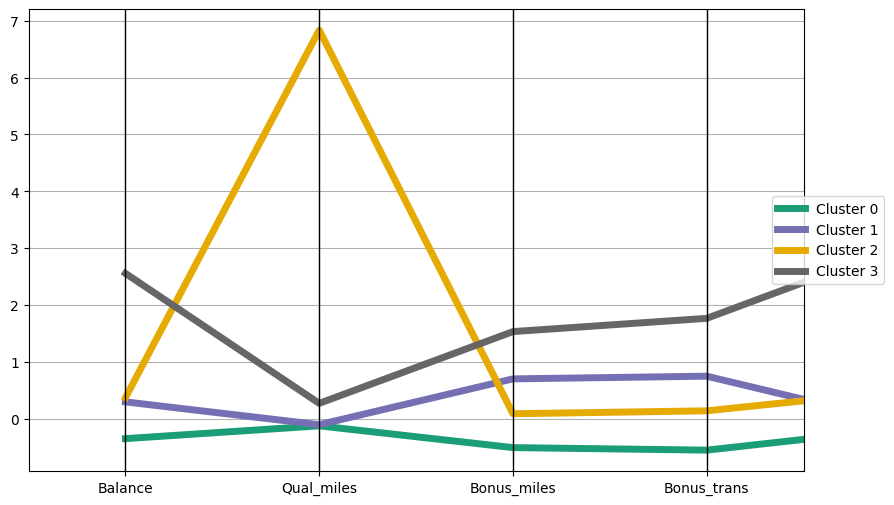

In [22]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,3.5)
centroids

In [23]:
name_your_datafram_df_KNorm.groupby(kmeans.labels_).mean()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll
0,-0.352479,-0.127608,-0.509895,-0.553352,-0.176349,-0.316863
1,0.296256,-0.107041,0.702229,0.748089,-0.070660,0.490718
2,0.368439,6.835889,0.085279,0.136918,0.490210,-0.109260
3,2.555269,0.268154,1.531015,1.764240,3.029675,0.548678


In [24]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2         3
0  0.000000  2.059378  7.094473  5.403274
1  2.059378  0.000000  7.045191  4.073160
2  7.094473  7.045191  0.000000  7.716053
3  5.403274  4.073160  7.716053  0.000000


In [25]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    14.557125
1    13.177729
2    21.855717
3    17.192487
dtype: float64

In [27]:
eastwest_df['clusterK'] = list(memb)

clusterSummaryK = eastwest_df.groupby(['clusterK']).agg({
    'Balance':'mean',
    'Qual_miles':'mean',
    'Bonus_miles':'mean',
    'Bonus_trans':'mean',
    'Flight_miles_12mo':'mean',
    'Days_since_enroll':'mean'
})
clusterSummaryK

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll
clusterK,,,,,,
0,38084.418023,45.400918,4831.937005,6.288277,213.160617,3464.275761
1,103452.988406,61.310870,34102.240580,18.785507,361.129710,5131.831884
2,110726.383333,5432.133333,19204.150000,12.916667,1146.366667,3892.950000
3,331078.098765,351.549383,54115.716049,28.543210,4701.703704,5251.512346


<div class="alert alert-block alert-success"> 
    <b>Cluster Labeling</b> <br>
    <ul>
        <li>Cluster 0: Moderate Value Customers <i>--- These customers have low to medium balances and moderate miles, representing average engagement. ---</i></li>
        <li>Cluster 1 Active Frequent Flyers: <i>--- Customers with high balances and many bonus miles; frequent travelers and loyal members---</i></li>
        <li>Cluster 2 Bonus-Oriented Travelers: <i>--- Customers focusing on earning miles via promotions and bonus programs ---</i></li>
        <li>Cluster 3 Premium Long-Term Members <i>--- High-value, long-term customers with the highest balances and flight miles. ---</i></li>
    </ul>
</div>

**Add cluster labels to the dataframe using the following block of code:**

In [28]:
eastwest_df['clusterKLabel'] = ""
eastwest_df['clusterKLabel'] = np.where(eastwest_df['clusterK'] == 0, 'Moderate Value Customers', eastwest_df['clusterKLabel'])
eastwest_df['clusterKLabel'] = np.where(eastwest_df['clusterK'] == 1, 'Active Frequent Flyers', eastwest_df['clusterKLabel'])
eastwest_df['clusterKLabel'] = np.where(eastwest_df['clusterK'] == 2, 'Bonus-Oriented Travelers', eastwest_df['clusterKLabel'])
eastwest_df['clusterKLabel'] = np.where(eastwest_df['clusterK'] == 3, 'Premium Long-Term Members', eastwest_df['clusterKLabel'])

<div class="alert alert-block alert-warning"> <b>Centroids vs. Cluster summary:</b><br>
    Centroids are computed based on normalized distance, and you can calculate cluster summaries by reversing the normalization process. You should multiply centroids by the standard deviation of each feature and add the feature's mean to the multiplication.
</div>

In [30]:
print((centroids * eastwest_df2.std(ddof=0)) + eastwest_df2.mean())

         Balance   Bonus_miles  Bonus_trans  Days_since_enroll  \
0   38077.316054   4814.538462     6.271739        3461.312709   
1  103229.266426  34026.620217    18.768953        5130.929242   
2  110726.383333  19204.150000    12.916667        3892.950000   
3  331078.098765  54115.716049    28.543210        5251.512346   

   Flight_miles_12mo   Qual_miles cluster  
0         211.913043    45.495819     NaN  
1         362.750181    61.089531     NaN  
2        1146.366667  5432.133333     NaN  
3        4701.703704   351.549383     NaN  


----
<div class="alert alert-block alert-danger"> <b>03-03) What is the elbow chart? Develop an elbow chart and cheque if the number of clusters you selected is optimum. (5%).</b>
</div>

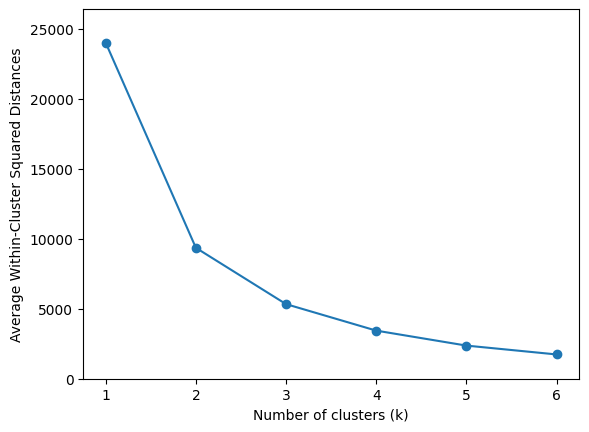

In [31]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit(eastwest_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)   # „Average WCSS“ wie in der Achsenbeschriftung
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()


<div class="alert alert-block alert-success"> <b>Optimum number of clusters</b> <br>
    ----------- <i> EXPLAIN WHAT ELBOW CHART IS </i> an elbow chart shows the relationship between the number of clusters (k) and the average within-cluster squared distances. It helps identify the point where adding more clusters no longer significantly reduces the distance, forming an “elbow” in the curve-<br> and
<br>
    ----------- <i> ARGUE IF THE NUMBER OF CLUSTERS THEY USED IS AN OPTIMUM ONE </i> I think yes. The curve sharply decreases until k = 4 and then flattens, wgich indicates diminishing improvement beyond this point. Therefore, 4 clusters should be the optimal choice for this dataset.-<br>
</div>

-----
-----
### Question 04: Hierarchical vs. K-Means (15%)
----
<div class="alert alert-block alert-danger"> <b>How do you compare these results with the results from hierarchical clustering? Are they similar or different?(15%)</b>
</div>

In [34]:
clusterSummaryHK = eastwest_df.groupby(['clusterKLabel','clusterHLabel']).agg({
    'Balance':'mean',
    'Qual_miles':'mean',
    'Bonus_miles':'mean',
    'Bonus_trans':'mean',
    'Flight_miles_12mo':'mean',
    'Days_since_enroll':'mean'
})
pd.set_option('display.max_rows', 10)
clusterSummaryHK.head(6)

Balance   Qual_miles  \
clusterKLabel            clusterHLabel                                        
Active Frequent Flyers   High Value Customers     77615.297260     5.984932   
                         Low Activity Customers  119389.235294  1838.176471   
                         Loyal Frequent Flyers   142517.417476    11.875728   
                         New Members              85646.069307   115.108911   
Bonus-Oriented Travelers Low Activity Customers  105775.333333  5464.877193   
                         New Members             204796.333333  4810.000000   

                                                  Bonus_miles  Bonus_trans  \
clusterKLabel            clusterHLabel                                       
Active Frequent Flyers   High Value Customers    23622.073973    17.553425   
                         Low Activity Customers  39268.147059    17.500000   
                         Loyal Frequent Flyers   50041.304854    19.634951   
                         New Members             26837.514851    23.792079   
Bonus-Oriented Travelers Low Activity Customers  19205.280702    12.087719   
                         New Members             19182.666667    28.666667   

                                                 Flight_miles_12mo  \
clusterKLabel            clusterHLabel                               
Active Frequent Flyers   High Value Customers           163.436986   
                         Low Activity Customers         454.411765   
                         Loyal Frequent Flyers          260.473786   
                         New Members                   2271.841584   
Bonus-Oriented Travelers Low Activity Customers         831.421053   
                         New Members                   7130.333333   

                                                 Days_since_enroll  
clusterKLabel            clusterHLabel                              
Active Frequent Flyers   High Value Customers          4729.889041  
                         Low Activity Customers        5323.911765  
                         Loyal Frequent Flyers         5735.219417  
                         New Members                   4895.623762  
Bonus-Oriented Travelers Low Activity Customers        3757.947368  
                         New Members                   6458.000000

<div class="alert alert-block alert-success"> <b>Similarities between heirarchical and K-Means clustering</b> <br>
    ----------- <i> REPORT THE OVERLAP BETWEEN K-MEANS AND HEIRARCHICAL CLUSTERING MODELS</i> Both methods produce similar clusters, frequent flyers and bonus-oriented travelers appear in both models. Minor differences occur in smaller subgroups due to different distance/linkage methods.<br>
</div>

-----
-----
### Question 05: Your Recommendations (20%)
----
<div class="alert alert-block alert-danger"> <b>As an airline frequent-flyer program manager, decide which clusters to target for incentive offers, explain why you chose this segment (10%).</b>
</div>

----

* I'd probably target the Bonus oriented and the Loyal Frequent flyers segments. These clusters represent customers with high engagements and strong/good spending behavior. They accumulate large balances and bonus miles and have frequent transcations. They are likely to respond positively to targeted offers and loyalty incentives,generating generating high long-term value for the airline. In contrast to those, Low Activity Customers or New Members show lower flight activity and weaker engagement, so they should be approached later with retention campaigns rather than premium offers

----

----
<div class="alert alert-block alert-danger"> <b>Propose types of offers for customers in the selected cluster(s) and explain why (10%).</b>  
</div>

----

*Bonus ortineted offer double or triple miles on specifics routes or sesons to reinfcores their award-driven behavoir. for Loyal frequnet flyer, provide exlusice tier updates, priority boarding or lounge access to strengten loyalty and retention.These offers align with their current behavior and can significantly increase satisfaction, loyalty, and profitability.*

----

-----
-----
### Question 06: Your Feedback (5%)
----
<div class="alert alert-block alert-danger"> <b>Feedback:(5%)</b>
    <ul>
        <li>How much time did you spend on this assignment? (1%)</li>
        <li>What prolems did you face? (2%)</li>
        <li>What did you learn? (2%)</li>
    </ul>    
</div>

----

4 hours min
coding error, typing errors. sometimes I wasn't sure how many variables need to be used, if two or all
plotting and clustering. clustering was tricky to me
----